In [1]:
import numpy as np
import wurtzite as wzt
import matplotlib.pyplot as plt
import matplotlib

### Method and discussion:

Zakladamy tutaj nastepujace rownania Love'a:

$u_x = \frac{b_x}{2\pi}[arctg(\frac{y}{x}) + \frac{xy}{2(1-\nu)(x^2 + y^2)}]$

$u_y = -\frac{b_x}{2\pi}[\frac{1-2\nu}{4(1-\nu)}ln\frac{x^2+y^2}{r_o^2} + \frac{x^2-y^2}{4(1-\nu)(x^2+y^2)}]$

$u_z = \frac{bz}{2\pi}arctg(\frac{y}{x})$

Rozumiem, że istnieją **założenia** co do tego, kiedy dane równanie może być zaaplikowane, np. że każda płaszczyzna krystalograficzna jest "płaska".

Założenia te nie są spełnione po zaaplikowaniu pierwszej dyslokacji. Możemy więc spróbować przekształcić siatkę po pierwszej dyslokacji do nowej "przestrzeni", w której te założenia będą już spełnione.

Dla uproszczenia dalszej analizy przyjmijmy przez chwilę, że warunek "płaszczyzna krystalograficzna jest "płaska"" oznacza, że wszystkie punkty na tej samej płaszczyźnie krystalograficznej mają taką samą współrzędną $y$.

Możemy więc przyjąć następującą strategię ($\mathbf{x} = (x, y, z)$, $\mathbf{u} = (u_x, u_y, u_z)$):

1. Przekształcamy $\mathbf{x}$ do nowej przestrzeni: $\mathbf{x} \rightarrow \mathbf{x}'$, w której wszystkie punkty z jednej płaszczyzny mają takie same $y$.
2. W przestrzeni rozwiązujemy równanie $\mathbf{u}' = f(\mathbf{x}'+\mathbf{u}')$ wzgl. $\mathbf{u}'$.
3. Przesuwamy o znalezione przesunięcie $\mathbf{x}' \leftarrow \mathbf{x}' + \mathbf{u}'$.
4. Przekształcamy w drugą stronę: $\mathbf{x}' \rightarrow \mathbf{x}$.

W jednej z prostszych sytuacji, jeżeli chcemy spełnić warunek że warunek "wszystkie punkty na tej samej płaszczyźnie krystalograficznej mają taką samą współrzędną $y$", to możemy sprobówać przyjąć następujące przekształcenie $\mathbf{x} \rightarrow \mathbf{x}'$.


$x' = x$

$y' = y - \Delta y(x, y, z)$

$z' = z$

oraz przeksztalcenie odwrotne:


$x = x'$

$y = y' + \Delta y(x, y, z)$

$z = z'$


Gdzie $\Delta y(x, y, z) = y_c - y_0$, gdzie $y_c$ to położenie $y$ atomów z konfiguracji aktualnej, $y_0$ to położenie atomów z konfiguracji pierwotnej (np. wyznaczone dla pierwszej z dyslokacji).


W punkcie 2. podstawiamy nowe $\mathbf{x}'$ do wzorów Love'a:

$u_x' = \frac{b_x}{2\pi}[arctg(\frac{y'}{x'}) + \frac{x'y'}{2(1-\nu)(x'^2 + y'^2)}]$

$u_y' = -\frac{b_x}{2\pi}[\frac{1-2\nu}{4(1-\nu)}ln\frac{x'^2+y'^2}{r_o^2} + \frac{x'^2-y'^2}{4(1-\nu)(x'^2+y'^2)}]$

$u_z' = \frac{bz}{2\pi}arctg(\frac{y'}{x'})$


(**UWAGA**: $y' = y - \Delta y(x, y, z)$, i należy brać to brać pod uwagę w sytuacji, gdyby była potrzebna np. $\frac{\delta u_x'}{\delta y}$ (bety); my tu jednak zakładamy, że liczymy $\frac{\delta u_x'}{\delta y'}$)

Rozwiązujemy równanie $\mathbf{u}' = f(\mathbf{x}'+\mathbf{u}')$ (np. metodą Newtona-Raphsona), i przekształcamy spowrotem do naszej oryginalnej przestrzeni używając przyjętej $\mathbf{x}' \rightarrow \mathbf{x}$.



W niniejszym notatniku powyższe przekształcenie $\mathbf{x} \rightarrow \mathbf{x}'$ sprowadziłem do jeszcze prostszej postaci, a mianiowicie:

$\mathbf{x}' = \mathbf{X}$

To jest, "przekształcamy" siatkę do konfiguracji pierwotnej (w której warunki do zaaplikowania wzorów Love'a są spełnione). 

Dzięki czemu powyższa procedura sprowadza się do następujących prostych kroków:
1. Wyznacz przesunięcia $\{\mathbf{u}_0, \mathbf{u}_1, ... \mathbf{u}_n\}$ dla dyslokacji $d_0, d_1, ... d_n$. Dla każdej z nich startujemy z konfiguracji pierwotnej (tak jakbyśmy wprowadzali pierwszą dyslokację).
2. Zsumuj przesunięcia: $\mathbf{u}_{\Omega}=\Sigma \mathbf{u}_i$. Jest to nasze przesunięcie całkowite (z konfiguracji pierwotnej $\mathbf{X}$ do konfiguracji aktualnej po n dyslokacjach $\mathbf{x_n}$).
3. Przesuń do konfiguracji aktualnej: $\mathbf{x}_n = \mathbf{X} + \mathbf{u}_{\Omega}$

Rezultaty poniżej.

## Initial configuration

In [2]:
l0 = wzt.generate.create_lattice(
    dimensions=(10, 10, 2),  #  The number of cells
    cell="B4_ZnS",
)

Reading bond: 1213/1213

Text(0.5, 1.0, 'Initial configuration')

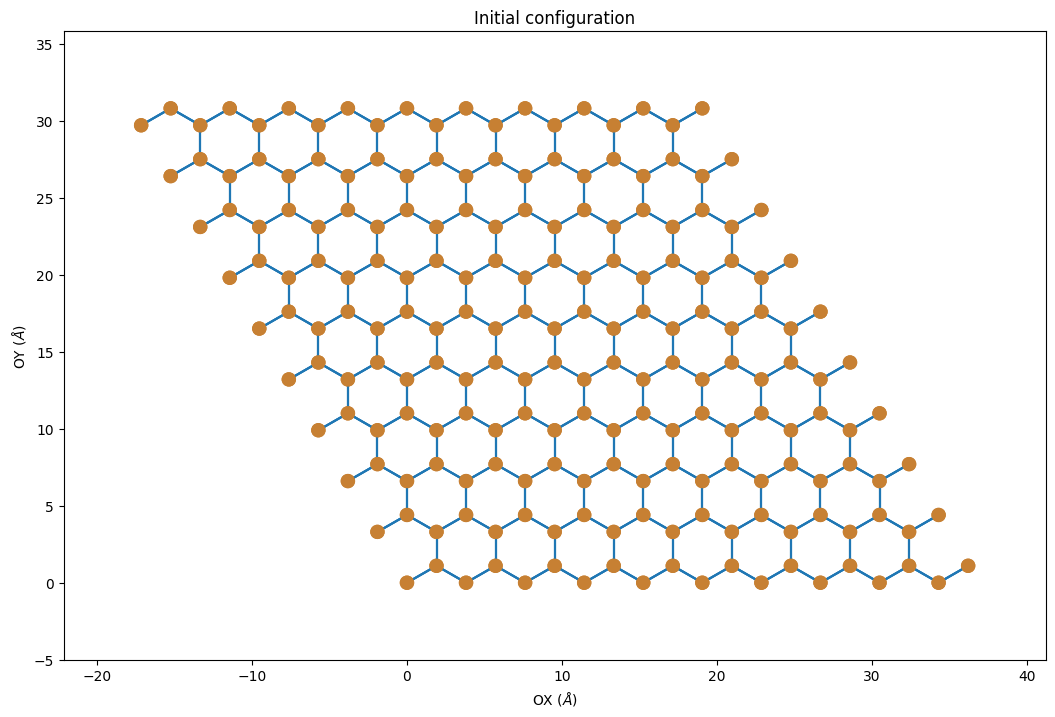

In [3]:
fig, ax = wzt.visualization.plot_atoms_2d(l0)
ax.set_title("Initial configuration")

## Dislocations

Genearting dislocation: 0
Reading bond: 1213/1213

<Figure size 640x480 with 0 Axes>

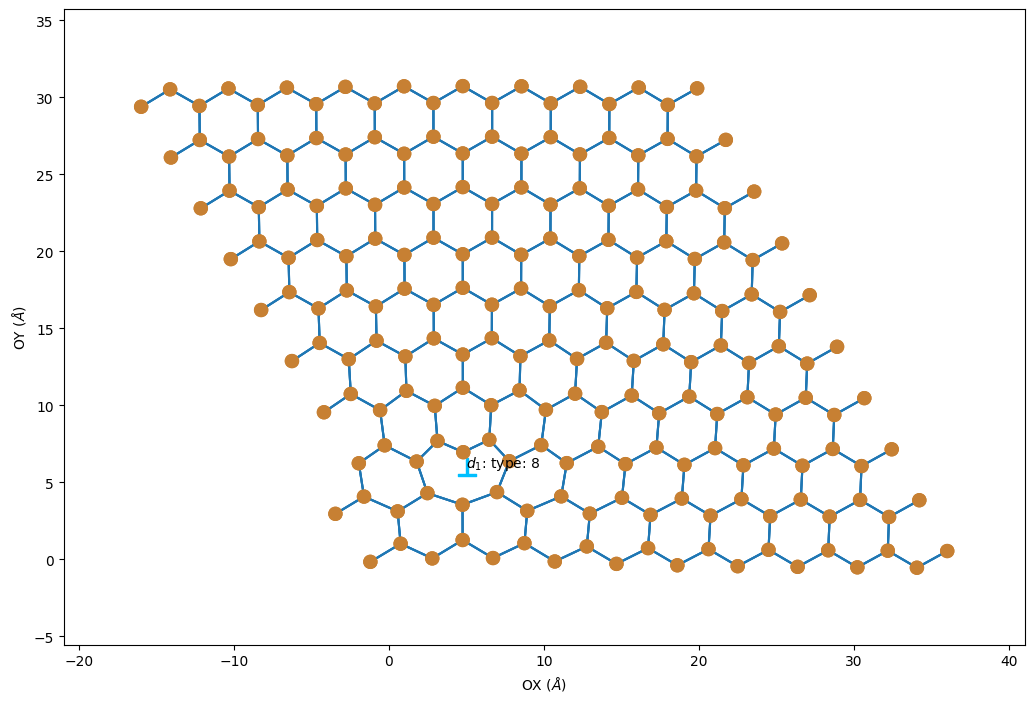

Genearting dislocation: 1
Reading bond: 1213/1213

<Figure size 640x480 with 0 Axes>

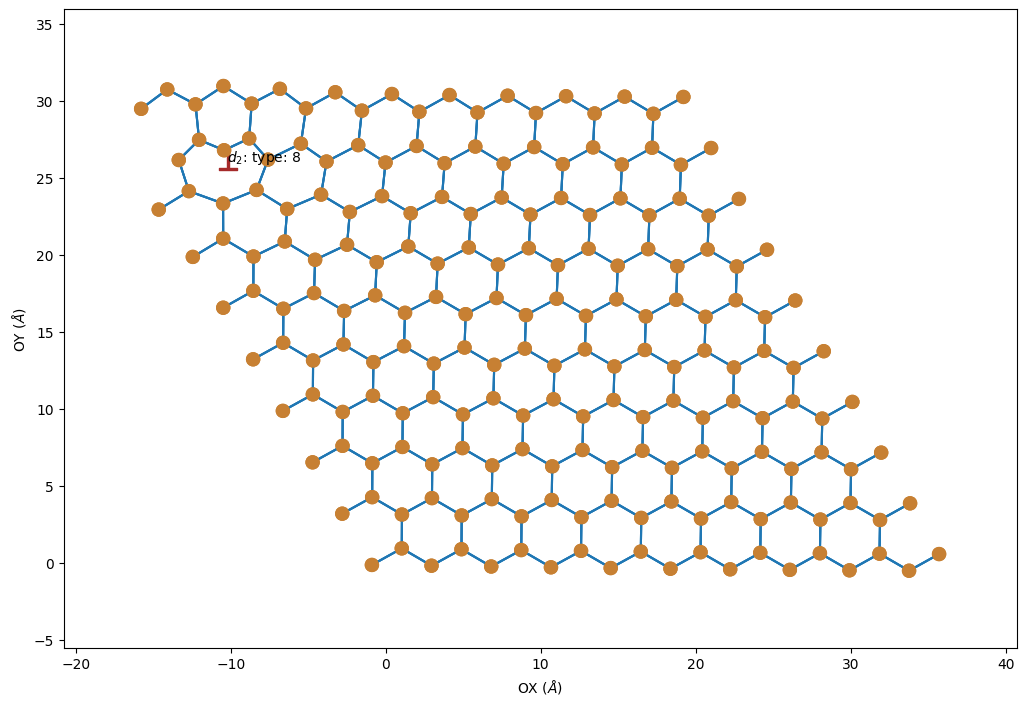

Genearting dislocation: 2
Reading bond: 1210/1210

<Figure size 640x480 with 0 Axes>

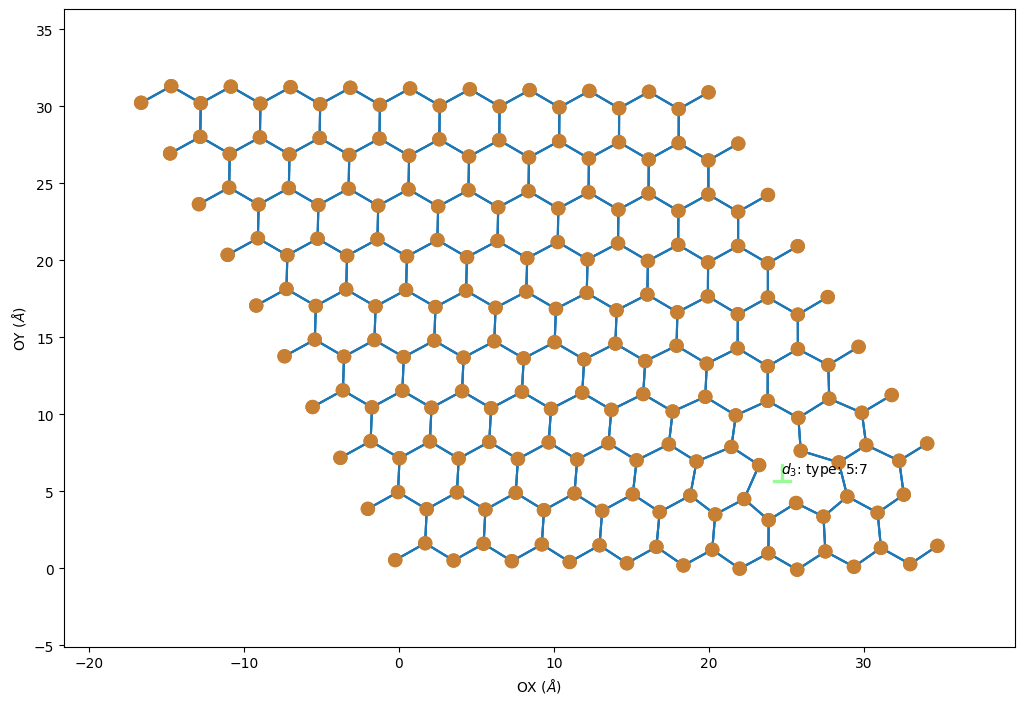

Genearting dislocation: 3
Reading bond: 1210/1210

<Figure size 640x480 with 0 Axes>

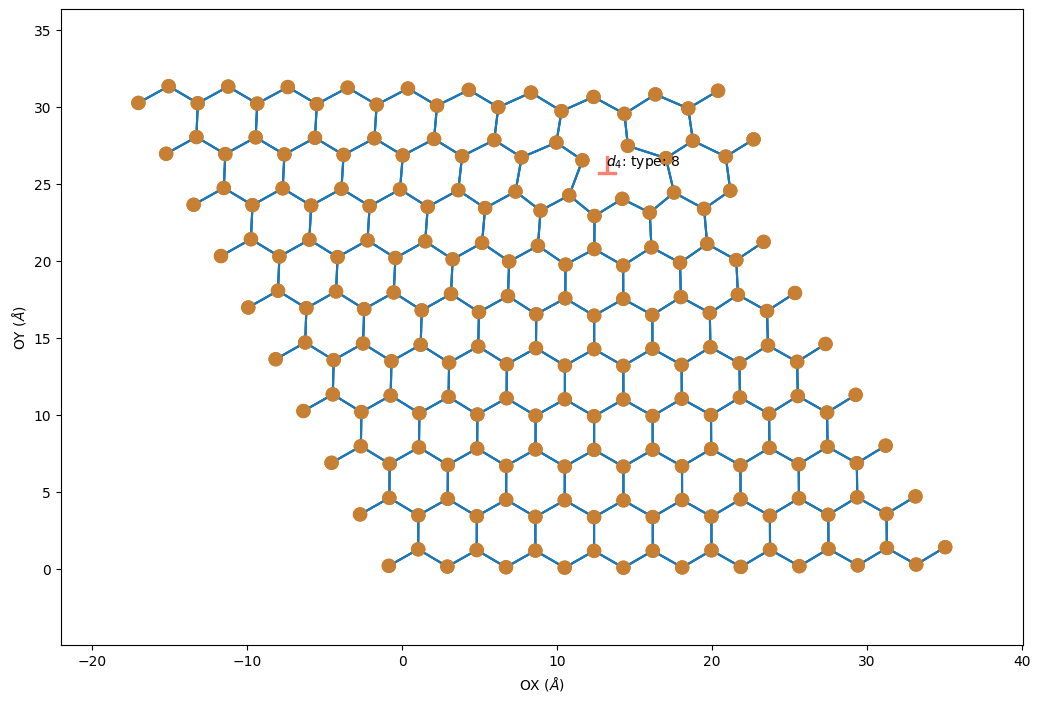

In [4]:
from dataclasses import dataclass

us = []


@dataclass(frozen=True)
class DislocationDef:
    b: np.ndarray
    position: np.ndarray
    plane: tuple
    label: str
    color: str = "brown"


dislocations = [
    DislocationDef(
        b=[1, 0, 0],
        position=[5, 6, 7.5],
        plane=(0, 0, 1),
        label="$d_1$: type: 8",
        color="deepskyblue"
    ),
     DislocationDef(
        b=[1, 0, 0],
        position=[-10.22, 26.11, 7.5],
        plane=(0, 0, 1),
        label="$d_2$: type: 8",
        color="brown" 
     ),
    DislocationDef(
        b=[-1, 0, 0],
        position=[24.65, 6.16, 7.5],
        plane=(0, 0, 1),
        label="$d_3$: type: 5:7",
        color="palegreen"
    ),
    DislocationDef(
        b=[-1, 0, 0],
        position=[13.18, 26.24, 7.5],
        plane=(0, 0, 1),
        label="$d_4$: type: 8",
        color="salmon"
    )
]


for i, d in enumerate(dislocations):
    print(f"Genearting dislocation: {i}")
    u = wzt.dislocations.displace_love(
        crystal=l0,
        position=d.position,
        burgers_vector=d.b,
        plane=d.plane,
        bv_fraction=1.0,
        tolerance=1e-4
    )
    us.append(u)
    # plt.figure() 
    # wzt.visualization.plot_displacement(l0, u)
    # plt.show()
    li = l0.translate(u)
    li = wzt.generate.update_bonds(li)
    plt.figure()
    fig, ax = wzt.visualization.plot_atoms_2d(li)
    plt.scatter(d.position[0], d.position[1], s=200.5, c=d.color, marker="$\\bot$")
    plt.text(d.position[0], d.position[1], d.label, zorder=1000)
    plt.show()

## Linear combination of displacements (sum)

<Figure size 640x480 with 0 Axes>

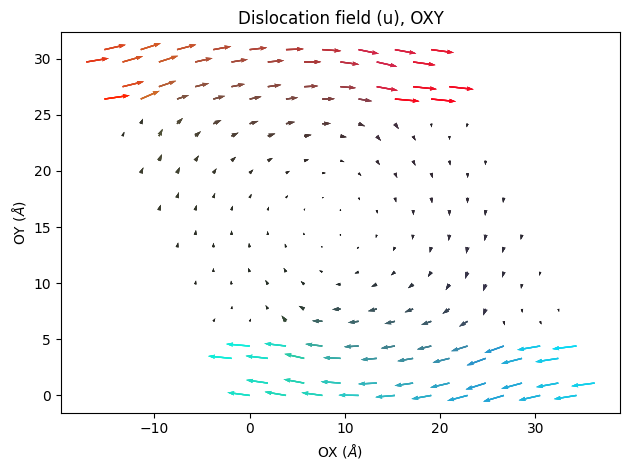

In [5]:
total_u = np.sum(us, axis=0)
plt.figure()
wzt.visualization.plot_displacement(l0, total_u)
plt.show()

In [6]:
import scipy.interpolate
interp = scipy.interpolate.LinearNDInterpolator(points=l0.coordinates, values=total_u[:, :2])
offsets = []
for d in dislocations:
    offset = interp(*d.position)
    offsets.append(offset)

Reading bond: 1207/1207[3.79487317 6.62118373]
[-8.00227743 27.10050827]
[23.78308813  5.45273874]
[15.71595406 25.9159383 ]


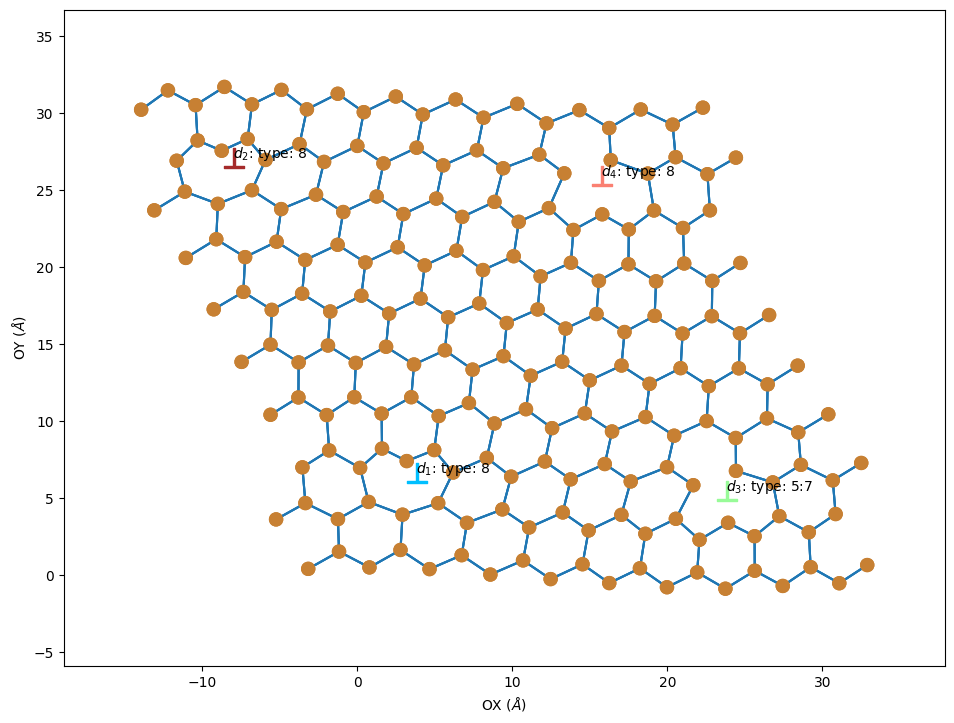

In [7]:
ln = l0.translate(total_u)
ln = wzt.generate.update_bonds(ln)
fig, ax = wzt.visualization.plot_atoms_2d(ln)
for d, offset in zip(dislocations, offsets):
    pos = d.position[:2] + offset
    print(pos)
    plt.scatter(pos[0], pos[1], s=250.5, c=d.color, marker="$\\bot$")
    plt.text(pos[0], pos[1], d.label, zorder=1000)

In [8]:
# wzt.visualization.render(molecule=ln, window_size=(800, 800))